In [1]:
import pandas as pd
arch_csv=r"C:\Users\carol\OneDrive\Desktop\espacios-culturales.csv"

# Intenta leer el archivo con diferentes encodings
try:
    df = pd.read_csv(arch_csv, encoding='utf-8',sep=";")  # Intento con UTF-8
except UnicodeDecodeError:
    df = pd.read_csv(arch_csv, encoding='latin1',sep=";")  # Intento con Latin-1
    
df.head()

,fid,FUNCION_PRINCIPAL,SUBCATEGORIA,ESTABLECIMIENTO,FUNCION_SECUNDARIA,PROGRAMACION,SUCURSAL,SALA,CALLE,ALTURA,...,TWITTER,INSTAGRAM,CAMARA_1,CAMARA_2,REDES,PUNTO_DE_CULTURA,OTRAS_REDES,CANTIDAD_SALAS,CAPACIDAD_TOTAL,TAG
0,1,ANFITEATRO,NaN,ALEMANIA,NaN,NaN,NaN,NaN,CASARES AV. Y CASTEX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ANFITEATRO,NaN,"ALLENDE, SALVADOR",NaN,NaN,NaN,NaN,"TAMBORINI, JOSE PASCUAL Y HOLMBERG",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,ANFITEATRO,NaN,ANFITEATRO ESCALINATA,NaN,NaN,NaN,NaN,2 DE ABRIL DE,1982.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,ANFITEATRO,NaN,ANFITEATRO EVA PERON,NaN,NaN,NaN,NaN,"MARECHAL, LEOPOLDO",832.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,5,ANFITEATRO,NaN,ANFITEATRO VILLA CILDAï¿½ï,NaN,NaN,NaN,NaN,"ALVAREZ, CRISOSTOMO",4401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#selecion de columnas a utilizar
colum=['FUNCION_PRINCIPAL','ESTABLECIMIENTO','CALLE','ALTURA','INSTAGRAM','LONGITUD','LATITUD','COMUNA']
df_nuevo=df[colum].copy()

# Reemplazar NaN por una cadena vacía en todo el DataFrame
df_nuevo.loc[:,'INSTAGRAM'] = df_nuevo['INSTAGRAM'].fillna('')

# llenado los NaN con '0' (como cadena), primero conviértelos de nuevo a NaN o a 0 (como número).
df_nuevo['ALTURA'] = pd.to_numeric(df_nuevo['ALTURA'], errors='coerce').fillna(0)

# Ahora, convierte la columna a entero.
df_nuevo['ALTURA'] = df_nuevo['ALTURA'].astype(int)

# Verifica el tipo de dato de la columna después de la conversión.
print(df_nuevo['ALTURA'].dtype)

#sacar duplicados
df_sin_dupli = df_nuevo.drop_duplicates(subset=['ESTABLECIMIENTO'], keep='first')


df_sin_dupli.head()

int32


,FUNCION_PRINCIPAL,ESTABLECIMIENTO,CALLE,ALTURA,INSTAGRAM,LONGITUD,LATITUD,COMUNA
0,ANFITEATRO,ALEMANIA,CASARES AV. Y CASTEX,0,,-5.840.855,-3.457.558,COMUNA 14
1,ANFITEATRO,"ALLENDE, SALVADOR","TAMBORINI, JOSE PASCUAL Y HOLMBERG",0,,-5.848.278,-3.456.202,COMUNA 12
2,ANFITEATRO,ANFITEATRO ESCALINATA,2 DE ABRIL DE,1982,,-584.921,-3.467.867,COMUNA 8
3,ANFITEATRO,ANFITEATRO EVA PERON,"MARECHAL, LEOPOLDO",832,,-5.843.747,-3.460.825,COMUNA 6
4,ANFITEATRO,ANFITEATRO VILLA CILDAï¿½ï,"ALVAREZ, CRISOSTOMO",4401,,-5.847.331,-3.466.032,COMUNA 9


In [3]:
# Contar la cantidad de espacios por función principal
conteo_funcion = df_sin_dupli['FUNCION_PRINCIPAL'].value_counts()

# Mostrar el resultado
print(conteo_funcion)



FUNCION_PRINCIPAL
BIBLIOTECA                         609
CENTRO CULTURAL                    427
LIBRERIA                           321
SALA DE TEATRO                     304
MONUMENTOS Y LUGARES HISTORICOS    282
BAR                                252
MUSEO                              169
GALERIA DE ARTE                    163
ESPACIO DE FORMACION               155
DISQUERIA                           62
CALESITA                            49
CLUB DE MUSICA EN VIVO              48
ESPACIO FERIAL                      36
ANFITEATRO                          29
SALA DE CINE                        22
CLUB DE MUSICA EN VIVO - NUEVO       2
Name: count, dtype: int64


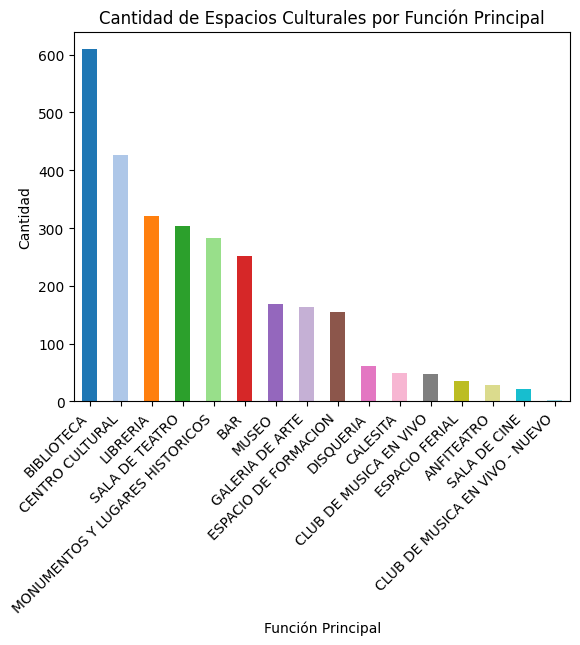

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Crear un mapa de colores utilizando una paleta de colores de matplotlib
cmap = plt.get_cmap('tab20')  # 'tab20' es una paleta con 20 colores distintos
colors = cmap(np.linspace(0, 1, len(conteo_funcion)))

# Ahora usa estos colores en tu gráfico
conteo_funcion.plot(kind='bar', color=colors)
plt.title('Cantidad de Espacios Culturales por Función Principal')
plt.xlabel('Función Principal')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()


In [5]:
# Contar la cantidad de espacios por calle
conteo_calle = df_sin_dupli['CALLE'].value_counts().head(10)  # Top 10 calles

# Mostrar el resultado
print(conteo_calle)


CALLE
JUNIN                 101
CORRIENTES AV.         98
RIVADAVIA AV.          55
CORDOBA AV.            40
DEL LIBERTADOR AV.     37
SARMIENTO              34
DE MAYO AV.            32
LAVALLE                31
SANTA FE AV.           29
VIAMONTE               27
Name: count, dtype: int64


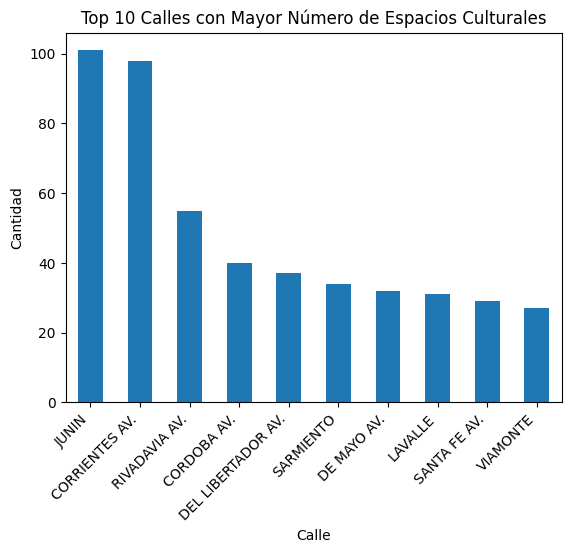

In [6]:
# Graficar los conteos de calle
conteo_calle.plot(kind='bar')
plt.title('Top 10 Calles con Mayor Número de Espacios Culturales')
plt.xlabel('Calle')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()


In [7]:
# Suponiendo que df_nuevo es tu DataFrame actualizado
# Calcular el porcentaje con cuenta de Instagram (ignorando las cadenas vacías)
porcentaje_instagram = (df_sin_dupli['INSTAGRAM'].apply(lambda x: x.strip() != '').sum() / len(df_nuevo)) * 100

# Mostrar el resultado
print(f"Porcentaje de Espacios Culturales con Instagram: {porcentaje_instagram:.2f}%")


Porcentaje de Espacios Culturales con Instagram: 15.79%


In [8]:
# Filtrar espacios que tienen una cuenta de Instagram válida (no NaN, no vacíos)
espacios_con_instagram = df_sin_dupli[
    df_sin_dupli['INSTAGRAM'].notna() &  # Excluir NaN
    df_sin_dupli['INSTAGRAM'].str.strip().ne('')  # Excluir cadenas vacías o solo espacios
]

# Ahora, agrupa por 'FUNCION_PRINCIPAL' y cuenta los establecimientos únicos
conteo_por_funcion = espacios_con_instagram.groupby('FUNCION_PRINCIPAL')['ESTABLECIMIENTO'].nunique()

# Ordenar los resultados y obtener los top
conteo_por_funcion = conteo_por_funcion.sort_values(ascending=False).head(15)

# Mostrar resultados
print(conteo_por_funcion)




FUNCION_PRINCIPAL
SALA DE TEATRO                     118
LIBRERIA                            89
GALERIA DE ARTE                     81
CENTRO CULTURAL                     73
BAR                                 36
BIBLIOTECA                          29
CLUB DE MUSICA EN VIVO              22
SALA DE CINE                        12
MUSEO                               11
ESPACIO DE FORMACION                10
MONUMENTOS Y LUGARES HISTORICOS      1
Name: ESTABLECIMIENTO, dtype: int64


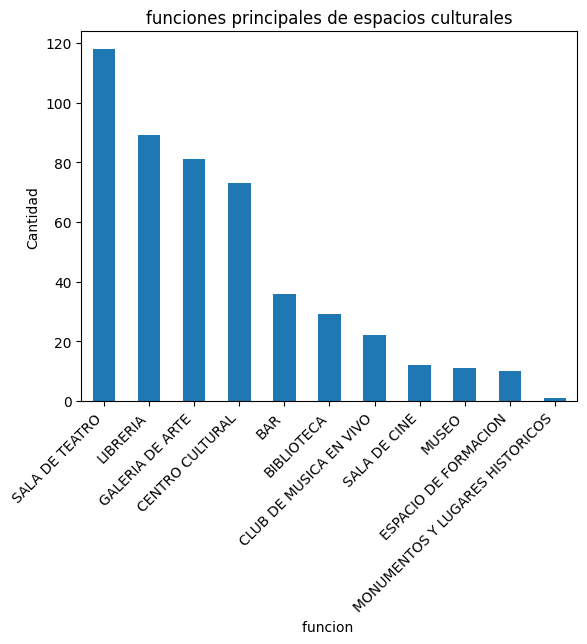

In [9]:
# Graficar por funciones principales 
conteo_por_funcion.plot(kind='bar')
plt.title('funciones principales de espacios culturales')
plt.xlabel('funcion ')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()
